In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions, JLD

In [2]:
dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

In [3]:
# Parametros
tamano_red = 5;
doble_sentido = false;
center_h_dist = 0.5;
sd_h_dist = 0;
h_distribution = Normal(center_h_dist, sd_h_dist);
n_cars = 800;
ti = 0.0;
tf = 150.0;
max_n_dias = 10;
path_jld = "test.jld";
diag_start = [7.,160.];
pendiente = -pi/5;

# Tipo Periférico/Churubusco

In [4]:
function make_churubusco(side_number::Integer, diagonal_start, diagonal_slope; both_ways=true)
    SquareNet, position_array, dist_matrix = SquareDiGraph(side_number, doble_sentido=both_ways);
    nw, posarr, distm, new_positions = add_diagonal!(SquareNet, position_array, diagonal_start, diagonal_slope, side_number, 40.);
    SquareNet, position_array, dist_matrix = make_slow_corners(nw, posarr, new_positions);
        
    m = nv(SquareNet);
    city_matrix = zeros(m,m,4);
    f = x -> [max_speed(i,j,x) for i in 1:length(x),j in 1:length(x)];
    city_matrix[:,:,1] = dist_matrix./f(position_array);
    city_matrix[:,:,2] = dist_matrix./5;
    city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);
    red_cuadrada=network(SquareNet,position_array,city_matrix);
    return red_cuadrada
end

make_churubusco (generic function with 1 method)

In [6]:
churubusco = make_churubusco(tamano_red, diag_start, pendiente, both_ways=doble_sentido);

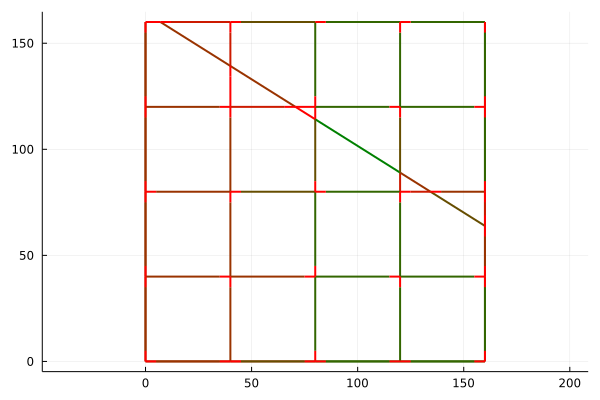

In [9]:
plot_digraph(churubusco.digraph, churubusco.position_array, attribute_matrix=churubusco.city_matrix[:,:,1], separated_edges=false)

# Tipo División del Norte

In [10]:
function make_div_del_norte(side_number::Integer, diagonal_start, diagonal_slope; both_ways=true)
    SquareNet, position_array, dist_matrix = SquareDiGraph(side_number, doble_sentido=both_ways);
    nw, posarr, distm, new_positions = add_diagonal!(SquareNet, position_array, diagonal_start, diagonal_slope, side_number, 40.);
    SquareNet, position_array, dist_matrix = make_slow_corners(nw, posarr);
        
    m = nv(SquareNet);
    city_matrix = zeros(m,m,4);
    f = x -> [max_speed(i,j,x) for i in 1:length(x),j in 1:length(x)];
    city_matrix[:,:,1] = dist_matrix./f(position_array);
    city_matrix[:,:,2] = dist_matrix./5;
    city_matrix[:,:,4] = BPR.(city_matrix[:,:,1], city_matrix[:,:,3],city_matrix[:,:,2]);
    red_cuadrada=network(SquareNet,position_array,city_matrix);
    return red_cuadrada
end

make_div_del_norte (generic function with 1 method)

In [11]:
div_nte = make_div_del_norte(tamano_red, diag_start, pendiente, both_ways=doble_sentido);

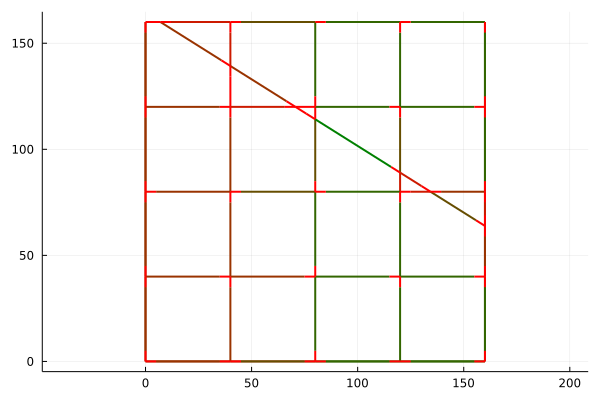

In [13]:
plot_digraph(div_nte.digraph, div_nte.position_array, attribute_matrix=div_nte.city_matrix[:,:,1], separated_edges=false)